In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df=pd.read_csv(r"C:\Users\Gaurav Ugale\Desktop\PROJECTS Python\Project Tasks\Clustering Cardiac arrest\Python_Clustering_Pr.csv")

In [14]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [15]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [17]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [19]:
df_1=df.drop('UnderRisk',axis=1)

Apply Kmean clustering on dataset

In [20]:
from sklearn.cluster import KMeans

In [21]:
cls = KMeans(n_clusters = 2)
cls.fit(df_1)

KMeans(n_clusters=2)

# check the wcss score

In [22]:
wcss = cls.inertia_
wcss

645.4620853080565

In [23]:
wcss = []
#select k value from 1 to 10
for i in range(1, 11):
    cls = KMeans(n_clusters = i, random_state = 42)
    cls.fit(df_1)
    # inertia method returns wcss for that model
    wcss.append(cls.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


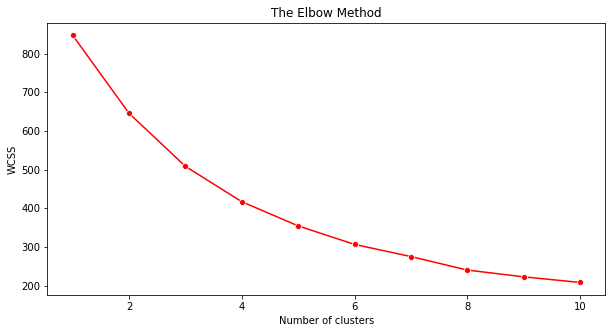

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The point at which the elbow shape is created is 4, that is, our K value or an optimal number of clusters is 4. 
Now let’s train the model on the dataset with a number of clusters 4

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_1)

y_kmeans give us different clusters corresponding to X. Now let’s plot all the clusters using matplotlib.

In [26]:
y_kmeans

array([3, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2,
       3, 1, 2, 3, 2, 0, 2, 2, 1, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 1, 0, 2, 1, 2, 3,
       2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 0, 2, 3, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 1, 1, 3, 3, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2,
       2, 3, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 3, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2,

print cluster centers

In [27]:
kmeans.cluster_centers_

array([[ 1.19444444e+00,  5.55555556e-02,  5.97222222e-01,
         5.55555556e-02, -2.22044605e-16,  5.55555556e-02,
         5.13888889e-01,  1.00000000e+00,  5.27777778e-01,
        -6.93889390e-18,  1.38888889e-02,  2.77777778e-02],
       [ 2.00000000e+00,  3.04347826e-02,  9.30434783e-01,
         4.78260870e-02,  1.00000000e+00,  3.04347826e-02,
        -3.46944695e-17,  4.34782609e-03,  9.60869565e-01,
         3.46944695e-18,  4.34782609e-03,  3.47826087e-02],
       [ 9.57230143e-01,  1.94289029e-16,  8.57433809e-01,
         9.57230143e-02,  1.00000000e+00,  7.12830957e-02,
         2.03665988e-03, -2.22044605e-16,  9.61303462e-01,
         2.44399185e-02,  2.44399185e-02,  3.46232179e-02],
       [ 1.07291667e+00,  1.00000000e+00,  6.97916667e-01,
         1.56250000e-01,  1.00000000e+00,  3.12500000e-02,
        -2.08166817e-17,  1.38777878e-17,  9.58333333e-01,
         4.16666667e-02,  5.20833333e-02,  2.08333333e-02]])

create column cluster for predicted labels value

In [28]:
df_1['cluster']=  y_kmeans
df_1.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,3
1,1,0,1,0,1,0,0,0,1,0,0,0,2
2,1,0,1,0,1,0,0,0,1,0,0,0,2
3,1,0,1,0,1,0,0,0,1,0,0,0,2
4,1,0,0,0,0,0,1,1,0,0,0,0,0


In [29]:
df_h = df.drop('UnderRisk',axis=1)

Plot the hierarchical clustering using scipy

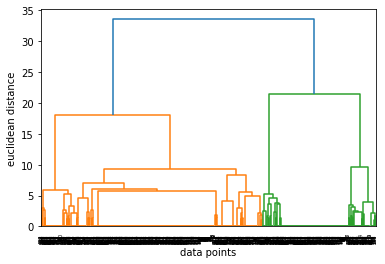

In [30]:
#The following linkage methods are used to compute the distance between two clusters 
# method='ward' uses the Ward variance minimization algorithm
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df_1, method = "ward")
#Plot the hierarchical clustering as a dendrogram.
#leaf_rotation : double, optional Specifies the angle (in degrees) to rotate the leaf labels.

dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# Apply AgglomerativeClustering using number of cluster

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")


In [33]:
cluster = hc.fit_predict(df_h)

# Create label column for predicted cluster label

In [34]:
df_h["label"] = cluster

In [37]:
df_h.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,0


# Show label counts

In [36]:
df_h.label.value_counts()

1    412
5    191
4     91
0     72
3     63
2     60
Name: label, dtype: int64

# show a silhouette score 

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
score_agg = silhouette_score(df_h, cluster)
score_agg

0.6832654795236572